In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import numpy.linalg as nla
import pandas as pnd
import sklearn.covariance as sklc

import sys
sys.path.append("C:/Users/pierr/OneDrive/Bureau/Dossier en haut à droite/Stage MIA 2023/Codes/Libraries")
import Fonctions as fc

## Paramètres

In [2]:
N1 = 100
D1 = 20
L1 = 10
C1 = 5
p = 0.1

eps = 1/10**6
nb_tries = 100

## Simulations

In [3]:
data_sets_1 = []
data_sets_2 = []
data_sets_3 = []

for t in range(nb_tries):
    
    #PCA/PPCA
    W, mu, sigma2 = fc.sim_param(D1,L1,s3=0.5)
    Z, Y = fc.sim_data(W,mu,sigma2,N1)
    data_sets_1.append([Z,Y])
        
    #RCA
    W, V, mu, sigma2 = fc.sim_param_cov(D1,L1,C1,s4=0.5)
    Z, Y, X = fc.sim_data_cov(W,V,mu,sigma2,N1)
    data_sets_2.append([Z,Y,X])
        
    #RCA LRPSI
    la = rd.normal(0,1)**2
    W, Lambda, sigma2 = fc.sim_param_LRPSI(D1,L1,s2=0.5,la=la)
    Z, Y, X = fc.sim_data_LRPSI(W,Lambda,N1,sigma2)
    data_sets_3.append([Z,Y,X])

## Estimations

In [4]:
PCA_sets = [[] for k in range(15)]
PPCA_EM_sets = [[] for k in range(15)]
PPCA_sets = [[] for k in range(15)]
ML_RCA_sets = [[] for k in range(15)]
ML_RCA_2_sets = [[] for k in range(15)]
RCA_LRPSI_sets = [[] for k in range(15)]

for t in range(nb_tries):
    
    #PCA/PPCA - données
    Z1,Y1 = data_sets_1[t]
    
    #RCA - données
    Z2, Y2, X2 = data_sets_2[t]
    
    #RCA(LRPSI) - données
    Z3, Y3, X3 = data_sets_3[t]
    
    for L in range(1,16):
        
        #PCA
        S_hat, W_hat, Z_hat = fc.PCA(Y1,L)
        Y_hat = Z_hat @ np.transpose(W_hat) + np.mean(Y1,axis=0)
        PCA_sets[L-1].append(Y_hat)
        
        #PPCA (version EM)
        W_hat, Z_hat, sigma2_hat = fc.PPCA_EM(Y1,L,err=eps,tempo=False)
        Y_hat = Z_hat @ np.transpose(W_hat) + np.mean(Y1,axis=0)
        PPCA_EM_sets[L-1].append(Y_hat)
        
        #PPCA (version directe)
        W_hat, Z_hat, sigma2_hat = fc.PPCA(Y1,L)
        Y_hat = Z_hat @ np.transpose(W_hat) + np.mean(Y1,axis=0)
        PPCA_sets[L-1].append(Y_hat)
        
        #RCA-ML (1ère version)
        W_hat, Z_hat, V_hat, Sigma_hat, sigma2_hat = fc.ML_RCA(Y2,X2,L,err=eps,tempo=False)
        mu_X = np.mean(X2,axis=0)
        Xc = np.array([x-mu_X for x in X2])
        Y_hat = Z_hat @ np.transpose(W_hat) + Xc@np.transpose(V_hat) + np.mean(Y2,axis=0)
        ML_RCA_sets[L-1].append(Y_hat)
        
        #RCA-ML (2e version)
        W_hat, Z_hat, V_hat, Sigma_hat, sigma2_hat = fc.ML_RCA_2(Y2,X2,L,err=eps,tempo=False)
        mu_X = np.mean(X2,axis=0)
        Xc = np.array([x-mu_X for x in X2])
        Y_hat = Z_hat @ np.transpose(W_hat) + Xc@np.transpose(V_hat) + np.mean(Y2,axis=0)
        ML_RCA_2_sets[L-1].append(Y_hat)
        
        #EM/RCA (LRPSI)
        W_hat, Z_hat, Lambda_hat, sigma2_hat = fc.EM_RCA_LRPSI(Y3,X3,L,err=eps,tempo=False)
        mu_X = np.mean(X3,axis=0)
        Xc = np.array([x-mu_X for x in X3])
        Y_hat = Z_hat @ np.transpose(W_hat) + Xc + np.mean(Y3,axis=0)
        RCA_LRPSI_sets[L-1].append(Y_hat)
    
    print('t =', t)

t = 0
t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10
t = 11
t = 12
t = 13
t = 14
t = 15
t = 16
t = 17
t = 18
t = 19
t = 20
t = 21
t = 22
t = 23
t = 24
t = 25
t = 26
t = 27
t = 28
t = 29
t = 30
t = 31
t = 32
t = 33
t = 34
t = 35
t = 36
t = 37
t = 38
t = 39
t = 40
t = 41
t = 42
t = 43
t = 44
t = 45
t = 46
t = 47
t = 48
t = 49
t = 50
t = 51
t = 52
t = 53
t = 54
t = 55
t = 56
t = 57
t = 58
t = 59
t = 60
t = 61
t = 62
t = 63
t = 64
t = 65
t = 66
t = 67
t = 68
t = 69
t = 70
t = 71
t = 72
t = 73
t = 74
t = 75
t = 76
t = 77
t = 78
t = 79
t = 80
t = 81
t = 82
t = 83
t = 84
t = 85
t = 86
t = 87
t = 88
t = 89
t = 90
t = 91
t = 92
t = 93
t = 94
t = 95
t = 96
t = 97
t = 98
t = 99


In [5]:
PCA_errors = [[] for k in range(15)]
PPCA_EM_errors = [[] for k in range(15)]
PPCA_errors = [[] for k in range(15)]
ML_RCA_errors = [[] for k in range(15)]
ML_RCA_2_errors = [[] for k in range(15)]
RCA_LRPSI_errors = [[] for k in range(15)]

for t in range(nb_tries):
    for k in range(15):
        
        #PCA
        dist = np.mean((data_sets_1[t][1]-PCA_sets[k][t])**2)
        PCA_errors[k].append(dist)
        
        #PPCA (version EM)
        dist = np.mean((data_sets_1[t][1]-PPCA_EM_sets[k][t])**2)
        PPCA_EM_errors[k].append(dist)
        
        #PPCA (version directe)
        dist = np.mean((data_sets_1[t][1]-PPCA_sets[k][t])**2)
        PPCA_errors[k].append(dist)
        
        #RCA (1ère version)
        dist = np.mean((data_sets_2[t][1]-ML_RCA_sets[k][t])**2)
        ML_RCA_errors[k].append(dist)
        
        #RCA (2e version)
        dist = np.mean((data_sets_2[t][1]-ML_RCA_2_sets[k][t])**2)
        ML_RCA_2_errors[k].append(dist)
        
        #EM/RCA (LRPSI)
        dist = np.mean((data_sets_3[t][1]-RCA_LRPSI_sets[k][t])**2)
        RCA_LRPSI_errors[k].append(dist)
        
    print('t = ', t)

t =  0
t =  1
t =  2
t =  3
t =  4
t =  5
t =  6
t =  7
t =  8
t =  9
t =  10
t =  11
t =  12
t =  13
t =  14
t =  15
t =  16
t =  17
t =  18
t =  19
t =  20
t =  21
t =  22
t =  23
t =  24
t =  25
t =  26
t =  27
t =  28
t =  29
t =  30
t =  31
t =  32
t =  33
t =  34
t =  35
t =  36
t =  37
t =  38
t =  39
t =  40
t =  41
t =  42
t =  43
t =  44
t =  45
t =  46
t =  47
t =  48
t =  49
t =  50
t =  51
t =  52
t =  53
t =  54
t =  55
t =  56
t =  57
t =  58
t =  59
t =  60
t =  61
t =  62
t =  63
t =  64
t =  65
t =  66
t =  67
t =  68
t =  69
t =  70
t =  71
t =  72
t =  73
t =  74
t =  75
t =  76
t =  77
t =  78
t =  79
t =  80
t =  81
t =  82
t =  83
t =  84
t =  85
t =  86
t =  87
t =  88
t =  89
t =  90
t =  91
t =  92
t =  93
t =  94
t =  95
t =  96
t =  97
t =  98
t =  99


In [16]:
plt.violinplot?

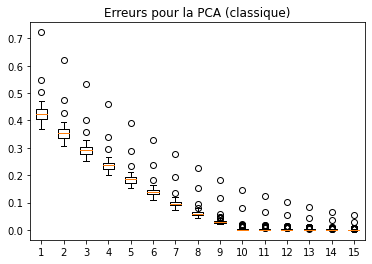

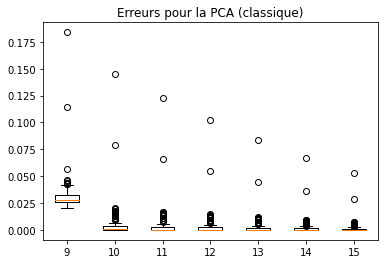

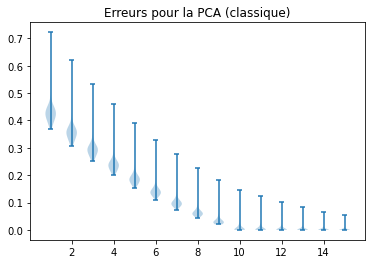

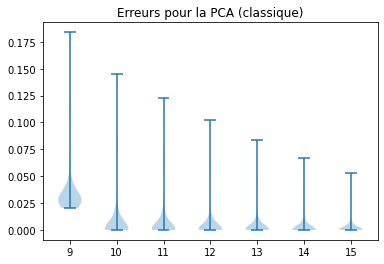

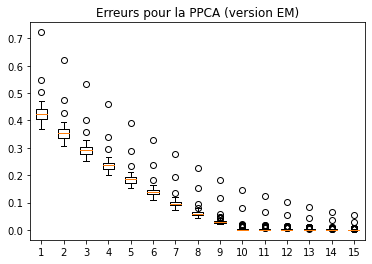

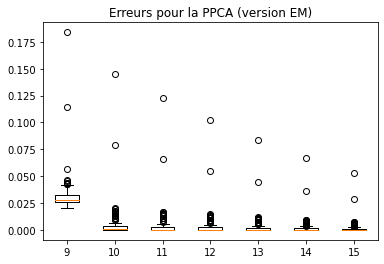

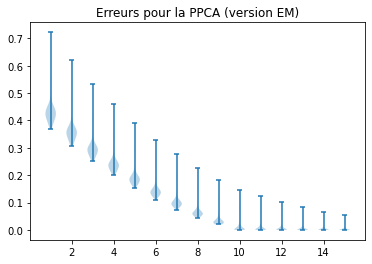

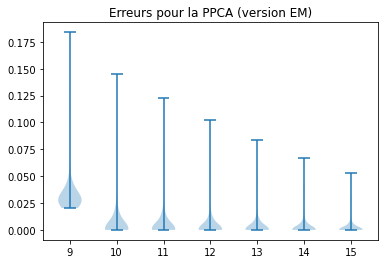

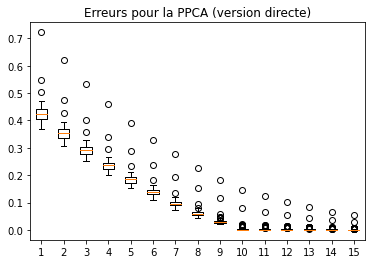

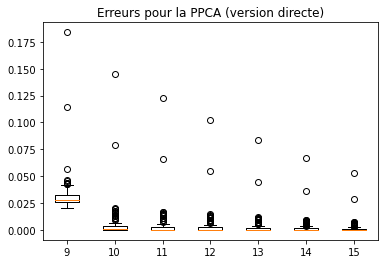

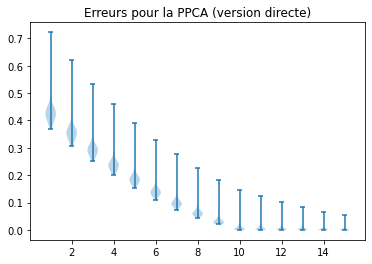

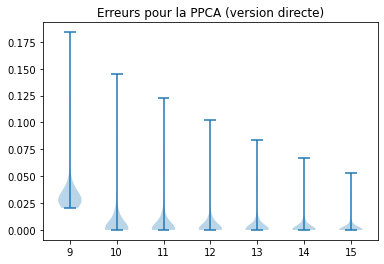

C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\

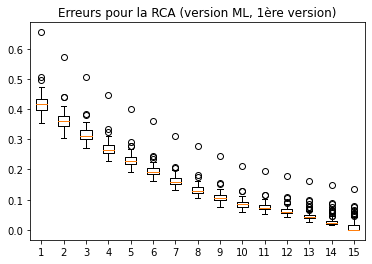

C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\

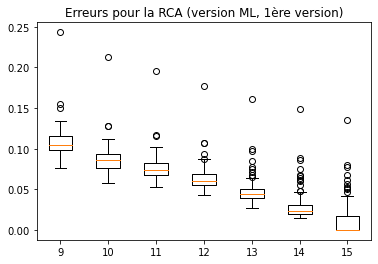

C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5407: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[0] = start
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5408: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[N + 1] = end
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5410: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[1:N + 1, 0] = x1slice
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5411: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[1:N + 1, 1] = yslice
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5412: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[N + 2:, 0] = x2slice[::-1]
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5413: ComplexWarning: Casting complex values to real discards the imagina

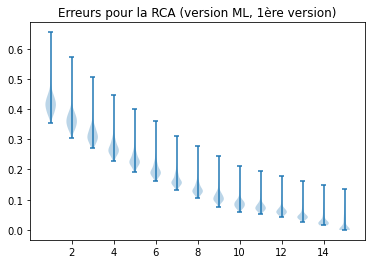

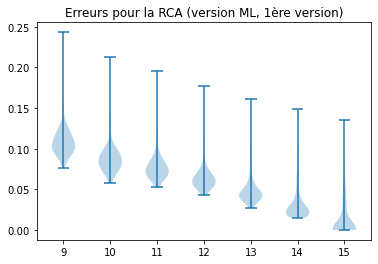

C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\

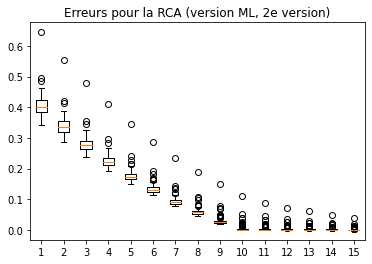

C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pierr\anaconda3\

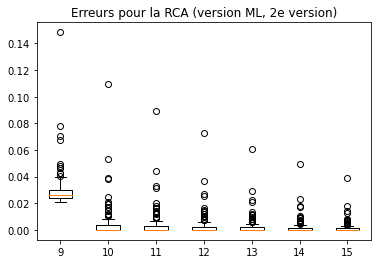

C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5407: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[0] = start
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5408: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[N + 1] = end
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5410: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[1:N + 1, 0] = x1slice
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5411: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[1:N + 1, 1] = yslice
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5412: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[N + 2:, 0] = x2slice[::-1]
C:\Users\pierr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5413: ComplexWarning: Casting complex values to real discards the imagina

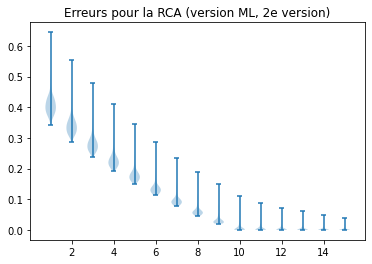

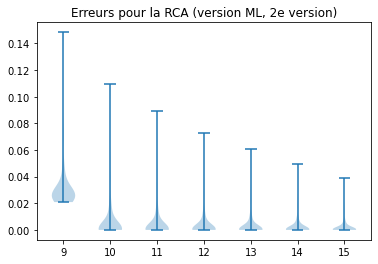

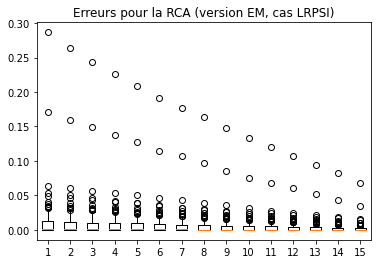

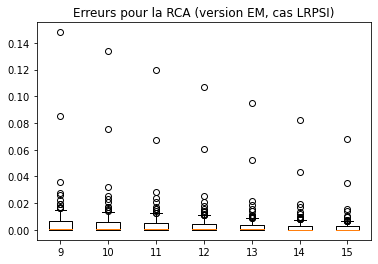

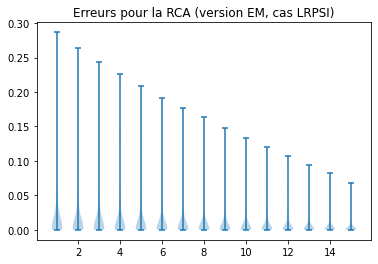

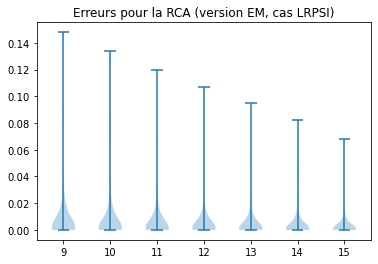

In [20]:
#PCA
plt.figure()
plt.boxplot(PCA_errors,positions=range(1,16))
plt.title("Erreurs pour la PCA (classique)")
plt.savefig('BP_PCA_1.png')
plt.show()

plt.figure()
plt.boxplot(PCA_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la PCA (classique)")
plt.savefig('BP_PCA_2.png')
plt.show()

plt.figure()
plt.violinplot(PCA_errors,positions=range(1,16))
plt.title("Erreurs pour la PCA (classique)")
plt.savefig('VP_PCA_1.png')
plt.show()

plt.figure()
plt.violinplot(PCA_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la PCA (classique)")
plt.savefig('VP_PCA_2.png')
plt.show()
 
#PPCA_EM (version EM)
plt.figure()
plt.boxplot(PPCA_EM_errors,positions=range(1,16))
plt.title("Erreurs pour la PPCA (version EM)")
plt.savefig('BP_PPCA_EM_1.png')
plt.show()

plt.figure()
plt.boxplot(PPCA_EM_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la PPCA (version EM)")
plt.savefig('BP_PPCA_EM_2.png')
plt.show()

plt.figure()
plt.violinplot(PPCA_EM_errors,positions=range(1,16))
plt.title("Erreurs pour la PPCA (version EM)")
plt.savefig('VP_PPCA_EM_1.png')
plt.show()

plt.figure()
plt.violinplot(PPCA_EM_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la PPCA (version EM)")
plt.savefig('VP_PPCA_EM_2.png')
plt.show()
    
#PPCA (version directe)
plt.figure()
plt.boxplot(PPCA_errors,positions=range(1,16))
plt.title("Erreurs pour la PPCA (version directe)")
plt.savefig('BP_PPCA_1.png')
plt.show()

plt.figure()
plt.boxplot(PPCA_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la PPCA (version directe)")
plt.savefig('BP_PPCA_2.png')
plt.show()

plt.figure()
plt.violinplot(PPCA_errors,positions=range(1,16))
plt.title("Erreurs pour la PPCA (version directe)")
plt.savefig('VP_PPCA_1.png')
plt.show()

plt.figure()
plt.violinplot(PPCA_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la PPCA (version directe)")
plt.savefig('VP_PPCA_2.png')
plt.show()
    
#RCA (1ère version)
plt.figure()
plt.boxplot(ML_RCA_errors,positions=range(1,16))
plt.title("Erreurs pour la RCA (version ML, 1ère version)")
plt.savefig('BP_ML_RCA_1.png')
plt.show()

plt.figure()
plt.boxplot(ML_RCA_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la RCA (version ML, 1ère version)")
plt.savefig('BP_ML_RCA_2.png')
plt.show()

plt.figure()
plt.violinplot(ML_RCA_errors,positions=range(1,16))
plt.title("Erreurs pour la RCA (version ML, 1ère version)")
plt.savefig('VP_ML_RCA_1.png')
plt.show()

plt.figure()
plt.violinplot(ML_RCA_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la RCA (version ML, 1ère version)")
plt.savefig('VP_ML_RCA_2.png')
plt.show()

#RCA (2e version)
plt.figure()
plt.boxplot(ML_RCA_2_errors,positions=range(1,16))
plt.title("Erreurs pour la RCA (version ML, 2e version)")
plt.savefig('BP_ML_RCA_2_1.png')
plt.show()

plt.figure()
plt.boxplot(ML_RCA_2_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la RCA (version ML, 2e version)")
plt.savefig('BP_ML_RCA_2_2.png')
plt.show()

plt.figure()
plt.violinplot(ML_RCA_2_errors,positions=range(1,16))
plt.title("Erreurs pour la RCA (version ML, 2e version)")
plt.savefig('VP_ML_RCA_2_1.png')
plt.show()

plt.figure()
plt.violinplot(ML_RCA_2_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la RCA (version ML, 2e version)")
plt.savefig('VP_ML_RCA_2_2.png')
plt.show()

#EM/RCA (LRPSI)
plt.figure()
plt.boxplot(RCA_LRPSI_errors,positions=range(1,16))
plt.title("Erreurs pour la RCA (version EM, cas LRPSI)")
plt.savefig('BP_RCA_LRPSI_1.png')
plt.show()

plt.figure()
plt.boxplot(RCA_LRPSI_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la RCA (version EM, cas LRPSI)")
plt.savefig('BP_RCA_LRPSI_2.png')
plt.show()

plt.figure()
plt.violinplot(RCA_LRPSI_errors,positions=range(1,16))
plt.title("Erreurs pour la RCA (version EM, cas LRPSI)")
plt.savefig('VP_RCA_LRPSI_1.png')
plt.show()

plt.figure()
plt.violinplot(RCA_LRPSI_errors[8:15],positions=range(9,16))
plt.title("Erreurs pour la RCA (version EM, cas LRPSI)")
plt.savefig('VP_RCA_LRPSI_2.png')
plt.show()

## Représentations graphiques

#### PCA (classique)

In [ ]:
for k in range(15):
    for j in range(int(D1/2)):
        
        plt.figure()
        
        plt.scatter(data_sets_1[0][1][:,2*j],data_sets_1[0][1][:,2*j+1],label='$Y$')
        plt.scatter(PCA_sets[k][0][:,2*j],PCA_sets[k][0][:,2*j+1],label='$\hat{Y}$')
               
        for i in range(N1):
            
            plt.plot([data_sets_1[0][1][i][2*j],PCA_sets[k][0][i,2*j]],[data_sets_1[0][1][i][2*j+1],PCA_sets[k][0][i,2*j+1]],color='red')
        
        plt.title('Erreur graphique pour la PCA (classique), L='+str(k+1))
        plt.legend()
        
        if j==0 :
            plt.savefig('RecGraph_PCA_L='+str(k+1)+'.png')
        
        plt.show()

#### PPCA (version EM)

In [ ]:
for k in range(15):
    for j in range(int(D1/2)):
        
        plt.figure()
        
        plt.scatter(data_sets_1[0][1][:,2*j],data_sets_1[0][1][:,2*j+1],label='$Y$')
        plt.scatter(PPCA_EM_sets[k][0][:,2*j],PPCA_EM_sets[k][0][:,2*j+1],label='$\hat{Y}$')
               
        for i in range(N1):
            
            plt.plot([data_sets_1[0][1][i][2*j],PPCA_EM_sets[k][0][i,2*j]],[data_sets_1[0][1][i][2*j+1],PPCA_EM_sets[k][0][i,2*j+1]],color='red')
        
        plt.title('Erreur graphique pour la PPCA (version EM), L='+str(k+1))
        plt.legend()
        
        if j==0 :
            plt.savefig('RecGraph_PPCA_EM_L='+str(k+1)+'.png')
            
        plt.show()

#### PPCA (version directe)

In [ ]:
for k in range(15):
    for j in range(int(D1/2)):
        
        plt.figure()
        
        plt.scatter(data_sets_1[0][1][:,2*j],data_sets_1[0][1][:,2*j+1],label='$Y$')
        plt.scatter(PPCA_sets[k][0][:,2*j],PPCA_sets[k][0][:,2*j+1],label='$\hat{Y}$')
               
        for i in range(N1):
            
            plt.plot([data_sets_1[0][1][i][2*j],PPCA_sets[k][0][i,2*j]],[data_sets_1[0][1][i][2*j+1],PPCA_sets[k][0][i,2*j+1]],color='red')
        
        plt.title('Erreur graphique pour la PPCA (version directe), L='+str(k+1))
        plt.legend()
        
        if j==0 :
            plt.savefig('RecGraph_PPCA_L='+str(k+1)+'.png')
        
        plt.show()

#### RCA (ML - 1ère version)

In [ ]:
for k in range(15):
    for j in range(int(D1/2)):
        
        plt.figure()
        
        plt.scatter(data_sets_2[0][1][:,2*j],data_sets_2[0][1][:,2*j+1],label='$Y$')
        plt.scatter(ML_RCA_sets[k][0][:,2*j],ML_RCA_sets[k][0][:,2*j+1],label='$\hat{Y}$')
               
        for i in range(N1):
            
            plt.plot([data_sets_2[0][1][i][2*j],ML_RCA_sets[k][0][i,2*j]],[data_sets_2[0][1][i][2*j+1],ML_RCA_sets[k][0][i,2*j+1]],color='red')
        
        plt.title('Erreur graphique pour la RCA (ML, 1ère version), L='+str(k+1))
        plt.legend()
        
        if j==0 :
            plt.savefig('RecGraph_ML_RCA_L='+str(k+1)+'.png')
        
        plt.show()

#### RCA (ML - 2e version)

In [ ]:
for k in range(15):
    for j in range(int(D1/2)):
        
        plt.figure()
        
        plt.scatter(data_sets_2[0][1][:,2*j],data_sets_2[0][1][:,2*j+1],label='$Y$')
        plt.scatter(ML_RCA_2_sets[k][0][:,2*j],ML_RCA_2_sets[k][0][:,2*j+1],label='$\hat{Y}$')
               
        for i in range(N1):
            
            plt.plot([data_sets_2[0][1][i][2*j],ML_RCA_2_sets[k][0][i,2*j]],[data_sets_2[0][1][i][2*j+1],ML_RCA_2_sets[k][0][i,2*j+1]],color='red')
        
        plt.title('Erreur graphique pour la RCA (ML, 2e version), L='+str(k+1))
        plt.legend()
        
        if j==0 :
            plt.savefig('RecGraph_ML_RCA_2_L='+str(k+1)+'.png')
        
        plt.show()

#### RCA (EM - cas LRPSI)

In [ ]:
for k in range(15):
    for j in range(int(D1/2)):
        
        plt.figure()
        
        plt.scatter(data_sets_3[0][1][:,2*j],data_sets_3[0][1][:,2*j+1],label='$Y$')
        plt.scatter(RCA_LRPSI_sets[k][0][:,2*j],RCA_LRPSI_sets[k][0][:,2*j+1],label='$\hat{Y}$')
               
        for i in range(N1):
            
            plt.plot([data_sets_3[0][1][i][2*j],RCA_LRPSI_sets[k][0][i,2*j]],[data_sets_3[0][1][i][2*j+1],RCA_LRPSI_sets[k][0][i,2*j+1]],color='red')
        
        plt.title('Erreur graphique pour la RCA (EM, cas LRPSI), L='+str(k+1))
        plt.legend()
        
        if j==0 :
            plt.savefig('RecGraph_RCA_LRPSI_L='+str(k+1)+'.png')
        
        plt.show()